# Problem Statement
Churn is a one of the biggest problem in the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%.

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]
## Data information

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

### The data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device   protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

First, Import the data stored in SQL Database.
- make a odbc connection
- read as a pandas Dataframe

In [1]:
import pandas as pd
import pyodbc 
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-FV1I7CQ;'
                      "uid=SanketDatabase;pwd=patil")

cursor = conn.cursor()

df = pd.read_sql_query('Select * from [Telco Churn ].dbo.[Telco-Customer-Churn]',conn)

Let's Look at the dataframe

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Initial plan for data exploration
- Overview the data
- check datatypes of the features
- check null values and take action
- Feature Engineering (One-hot-encoding, skewness check)
- Data Exploration (Visual Analysis)

In [3]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns # For creating plots

In [4]:
print(df.shape)
print(df.columns.tolist())

(7043, 21)
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


- We have 7043 customer data and 21 columns including target variable Churn
- Now we should look at datatype for each column

In [5]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure               object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


- change the data type of tenure and seniorCitizen column
- check null values 

In [6]:
df.tenure = pd.to_numeric(df.tenure, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- Drop missing values
- Customer ID is not going to help ML model; we must drop that coulmn
- replace the churn values i.e Yes, No to 1,0

In [7]:
df.dropna(inplace = True)
df2 = df.iloc[:,1:]

df2['Churn'] = df2['Churn'].replace(['Yes', 'No'], [1, 0])
df2['SeniorCitizen'] = df2['SeniorCitizen'].replace(['1','0'], ['Yes', 'No'])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


- Get a Pd.Series consisting of all the string categoricals
- print the list

In [8]:
one_hot_encode_cols = df2.dtypes[df.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields
one_hot_encode_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

- Target variable is also object dtype and is present in list, copy manually 
- use one-hot-encoding 

In [9]:
df2 = pd.get_dummies(df2, columns=['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod'], drop_first=True) # drops the first level
df2.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


- numerical feature is not skewed lets see below

Populating the interactive namespace from numpy and matplotlib


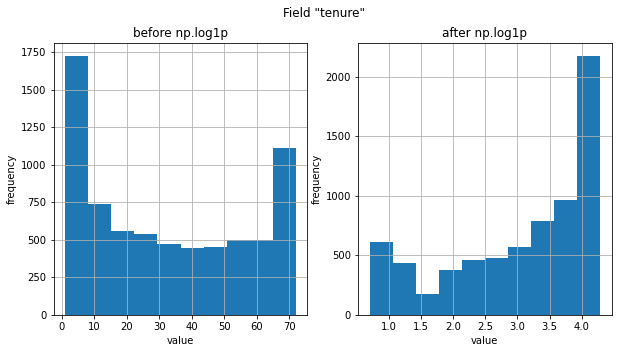

In [10]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.
%pylab inline

# Choose a field
field = "tenure"                

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df2[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df2[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

- see the correlation of churn with other variable

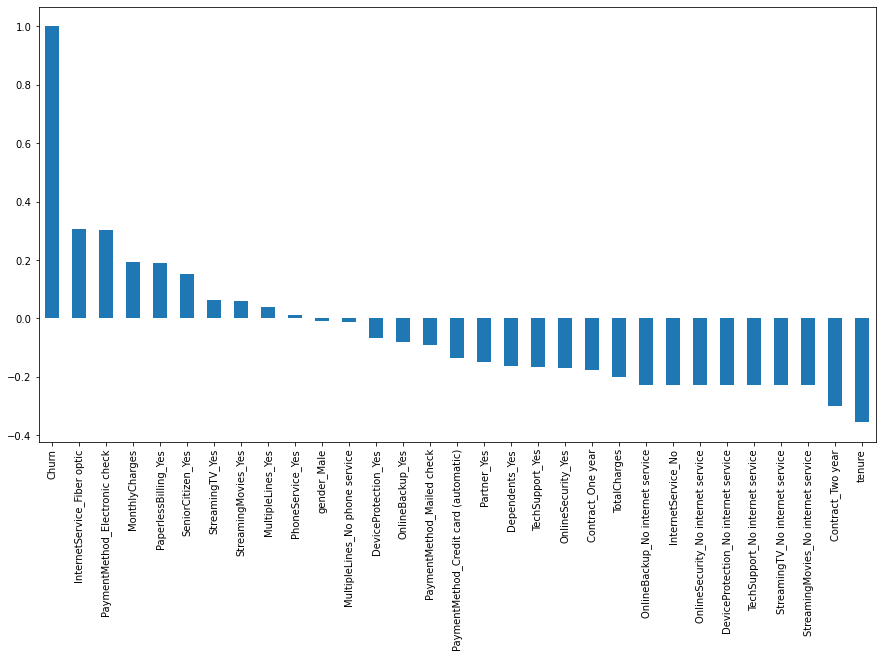

In [11]:
plt.figure(figsize=(15,8))
df2.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

## Visual Analysis
1. see gender distribution in the dataset
  
  It is equal in distribution

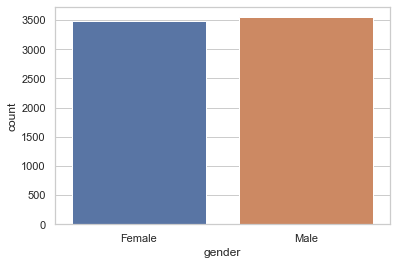

In [12]:
sns.set(style="whitegrid")
ax = sns.countplot( df['gender'])

2. see SeniorCitizen distribution in the dataset
   
   About 16% customer are Senior Citizen

Text(0.5, 1.0, '% of Senior Citizens')

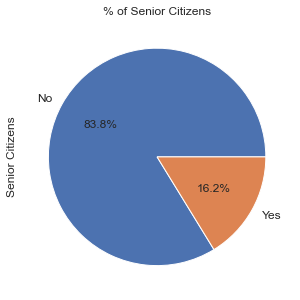

In [13]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )  
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

- Plot dependent and non dependent customers to gender

([<matplotlib.axis.XTick at 0x24d05343490>,
 [Text(0, 0, 'Not a Dependents'), Text(0, 0, 'Dependents')])

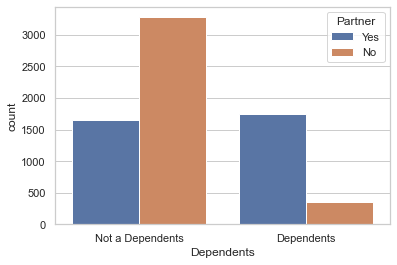

In [14]:
sns.set(style="whitegrid")
ax = sns.countplot( df['Dependents'], hue= df.Partner)
plt.xticks([0,1], ['Not a Dependents', 'Dependents'])

- plot contract type counts

Text(0.5, 1.0, '# of Customers by Contract Type')

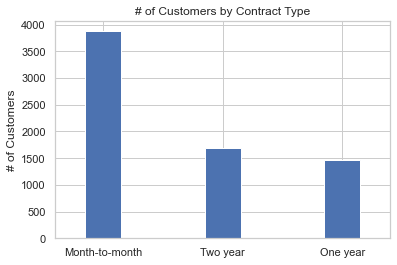

In [15]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

- How many custmer in this dataset churned ?
   
   26.578498 percent customer in this dataset churned

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

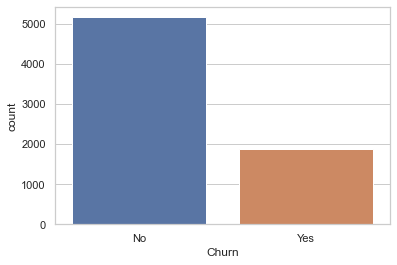

In [16]:
sns.set(style="whitegrid")
ax = sns.countplot( df['Churn'])
((df['Churn']).value_counts() / len(df))*100

## Discuss some hypothesis

1. longerTenure of the customer tends to less likely that they churn 
2. dependent customers churn significantly
3. customers who has Month-to-Month contract likely to churn significantly

take 2nd hypothesis

- Null Hypothesis = dependent customers dont churn more or no significant difference
- Alternative Hypothesis = dependent customers churn more

probability to churn is 50%

In [17]:
pd.value_counts(df2['Churn'])

0    5163
1    1869
Name: Churn, dtype: int64

In [18]:
df3= df.loc[df2['Churn'] == 1]
df3.Dependents.value_counts()

No     1543
Yes     326
Name: Dependents, dtype: int64

In [19]:
from scipy.stats import binom
1 - binom.cdf(326, 1869, 0.5)


1.0

#### hence, ~100%  is more than 5% , so we cannot reject the null hypothesis and conclude that dependent customers dont churn more

In the next step in this problem I would focus on numerical veriable and try to improve the transformation as well as try different ML models on the dataset

#### Summary 
In this notebook we explored the data, performed feature Engineering as well as data cleaning. there was no significant missing values in the dataset, thus It was a very much clean and organised dataset to analyse